In [1]:
%matplotlib inline
import numpy as np
import pylab as plt
from datetime import datetime
import datetime as dt
import netCDF4 as nc
import os, glob
import time
os.environ['TZ'] = 'UTC'
#from scipy.io import netcdf

In [21]:
files=glob.glob('/Users/snesbitt/data/gpm/gcpex/McGill/VERTIX/*vertix_gcpex_20120224.nc')
units='seconds since 2012-01-01 00:00 UTC'


for ifile in files:

#    outpath='/Users/snesbitt/data/gpm/gcpex/radiometer_CARE/data/nc'

    rootgrp = nc.Dataset(ifile, 'r')
    
    base_time=rootgrp.variables['base_time'][:]
    
    vertix={}
    vertix['dt']=np.zeros(len(base_time),dtype=datetime)
    vertix['frachr']=np.zeros(len(base_time),dtype=float)


    for it in np.arange(len(base_time)):
        vertix['dt'][it]=datetime.fromtimestamp(base_time[it])
        vertix['frachr'][it]=vertix['dt'][it].hour+vertix['dt'][it].minute/60.+vertix['dt'][it].second/3600.
    
    vertix['DBZ']=rootgrp.variables['DBZ'][:]
    vertix['DV']=rootgrp.variables['DV'][:]
    vertix['rg']=rootgrp.variables['Range'][:]
    
    rootgrp.close()

files=glob.glob('/Users/snesbitt/data/gpm/gcpex/McGill/WBAND/*wband_gcpex_20120224.nc')
units='seconds since 2012-01-01 00:00 UTC'


for ifile in files:

#    outpath='/Users/snesbitt/data/gpm/gcpex/radiometer_CARE/data/nc'

    rootgrp = nc.Dataset(ifile, 'r')
    
    base_time=rootgrp.variables['base_time'][:]
    
    WBAND={}
    WBAND['dt']=np.zeros(len(base_time),dtype=datetime)
    WBAND['frachr']=np.zeros(len(base_time),dtype=float)
    
    for it in np.arange(len(base_time)):
        WBAND['dt'][it]=datetime.fromtimestamp(base_time[it])
        WBAND['frachr'][it]=WBAND['dt'][it].hour+WBAND['dt'][it].minute/60.+WBAND['dt'][it].second/3600.


    
    WBAND['DBZ']=rootgrp.variables['DBZ'][:]
    WBAND['DV']=rootgrp.variables['DV'][:]
    WBAND['rg']=rootgrp.variables['Range'][:]

   
    rootgrp.close()



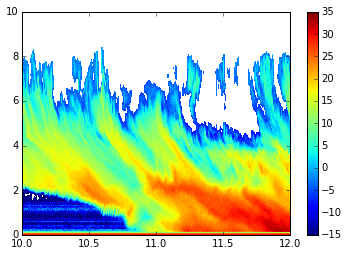

In [25]:
plt.figure()
timeslice=np.where((vertix['frachr'] > 10) & (vertix['frachr'] < 12))
plt.pcolormesh(vertix['frachr'][timeslice],vertix['rg'],np.transpose(vertix['DBZ'][timeslice]),vmin=-15,vmax=35)
plt.xlim([10,12])
#plt.imshow(np.transpose(vertix['DBZ']),aspect=[1,1])
plt.colorbar()
plt.show()

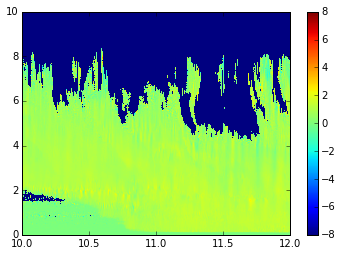

In [26]:
plt.figure()
timeslice=np.where((vertix['frachr'] > 10) & (vertix['frachr'] < 12))
plt.pcolormesh(vertix['frachr'][timeslice],vertix['rg'],np.transpose(vertix['DV'][timeslice]),vmin=-8,vmax=8)
plt.xlim([10,12])
#plt.imshow(np.transpose(vertix['DBZ']),aspect=[1,1])
plt.colorbar()
plt.show()

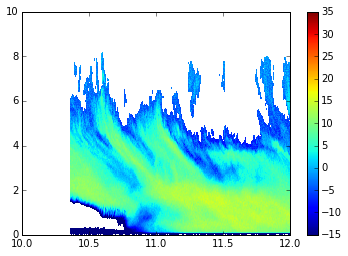

In [27]:
plt.figure()
timeslice=np.where((WBAND['frachr'] > 10) & (WBAND['frachr'] < 12))
plt.pcolormesh(WBAND['frachr'][timeslice],WBAND['rg'],np.transpose(WBAND['DBZ'][timeslice]),vmin=-15,vmax=35)
plt.xlim([10,12])
#plt.imshow(np.transpose(vertix['DBZ']),aspect=[1,1])
plt.colorbar()
plt.show()

In [78]:
ifile='/Users/snesbitt/data/gpm/gcpex/radiometer_CARE/data/radiometer_CARE_2012-02-24_00-02-00_lv2.csv.nc'

rootgrp = nc.Dataset(ifile, 'r')
radiometer={}
radiometer['frachr']=rootgrp.variables['frachr']
radiometer['lqint']=rootgrp.variables['lqint']


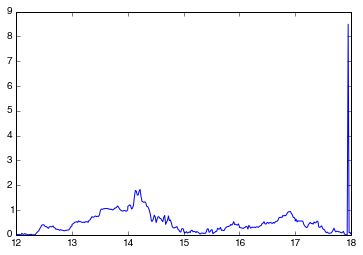

In [81]:
plt.figure()
plt.plot(radiometer['frachr'],radiometer['lqint'])
plt.xlim([12,18])
plt.show()

In [51]:
vertix['dt'][0].hour+vertix['dt'][0].minute/60.+vertix['dt'][0].second/3600.

0.0

In [22]:
WBAND['frachr']

array([ 10.3625    ,  10.36333333,  10.36388889, ...,  11.99861111,
        11.99916667,  11.99972222])